
# 第二次作品: for迴圈與圖形的結合應用
# 本次作品使用for迴圈來繪製各種特別的圖形，探討如何使用不同方法來達成相同的效果，並且讓繪製的參數客製化且易於更改

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pandas as pd
import random

## 第一題: 繪製同心圓加上marker
### 方法一: 採用$x = rcos(\theta), y = rsin(\theta)$的方式來繪製
### 討論:
本題利用了圓的公式$(rcos\theta)^2 + (rsin\theta)^2 = r^2$先用<i>ax.plot()</i>畫上去 <br/>
接著marker的部分用圓的半徑搭配上最一開始設定的marker的角度，用$ax.scatter()$來畫上去 <br/>
顏色種類的選擇則是利用了計數器來對最一開始的顏色$list$來迴圈 


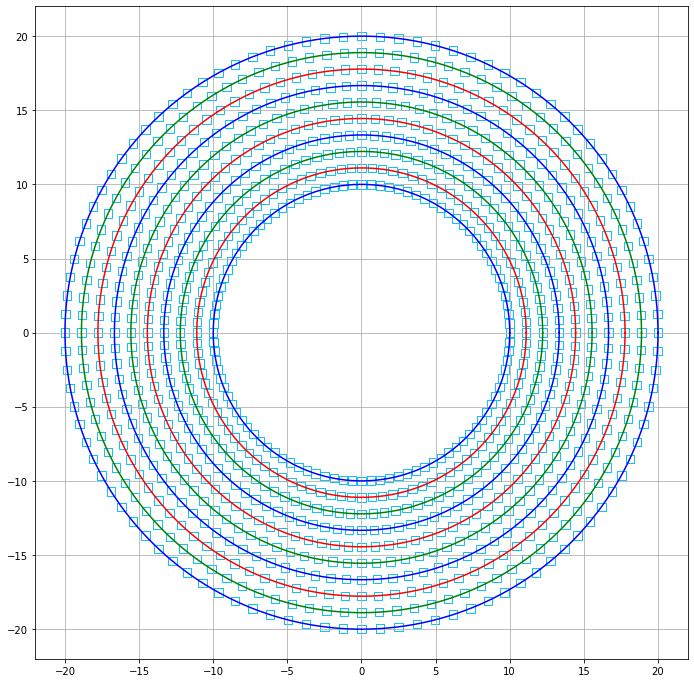

In [52]:
# 參數設定
n = 2000 # 一圈的點的數量
circle_num = 10 # 圓圈的數量
radius_min, radius_max = 10, 20 # 最小和最大園的半徑
color = ["blue", "red", "green"] # 圓圈的顏色 / should be list
marker_num = 100 # 一圈中marker的數量
marker = "s" # marker種類

#-------------------------------------

# 設定座標
radius = np.linspace(radius_min, radius_max, circle_num, endpoint=True)
marker_ang = np.linspace(0, 2 * np.pi, marker_num, endpoint= False)

#-------------------------------------

# figure, axes參數設定
fig, ax = plt.subplots(figsize = [12, 12])
ax.set_xlim([-radius_max*1.1, radius_max*1.1])
ax.set_ylim([-radius_max*1.1, radius_max*1.1])
ax.grid(True)
ax.set_aspect("equal")
count = 0

#-------------------------------------


# 畫圖
for i in radius:
    angle = np.linspace(0, 2 * np.pi, n)
    x = i * np.cos(angle)
    y = i * np.sin(angle)
    marker_x, marker_y  = i * np.cos(marker_ang), i * np.sin(marker_ang)
    ax.plot(x, y, color = color[count % len(color)])
    ax.scatter(marker_x, marker_y, s = 70, marker = marker, 
    facecolors = "None", edgecolors= "#11C1F7")
    count += 1
plt.show()

### 方法二: 採用<i>add_patch()</i>的方式繪製
### 討論
相較於前一題的方法，這題直接用<i>add_patch()</i>的方法，而不是像前一題創造座標的方法，相較而言更有效率 <br/>
並且再多了一些更客製化的參數設定，圓圈的顏色跟marker的顏色可以隨機也可以指定

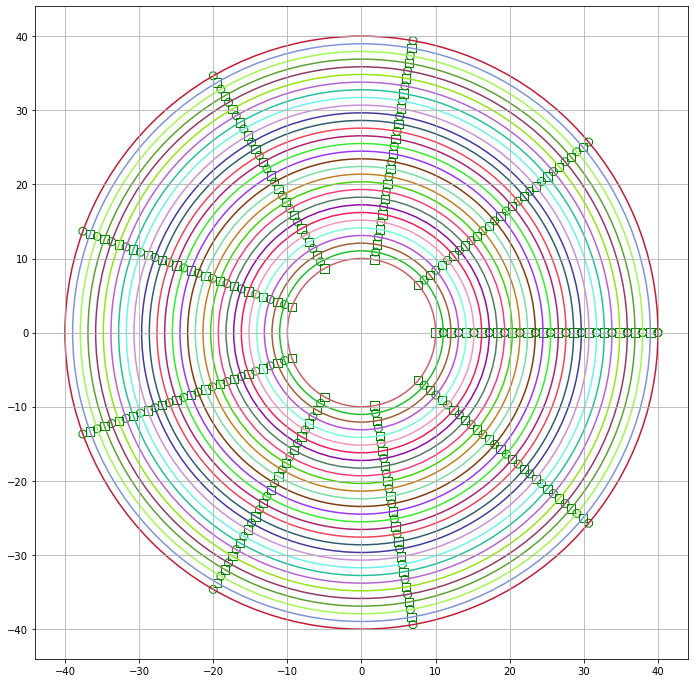

In [53]:
# 參數設定
radius_min, radius_max = 10, 40 # 最小和最大園的半徑
num_circle = 30 # 圓圈的數量
color = [] # 圓圈的顏色 / should be list / 可以為空list，則隨機產生顏色
marker = [",", "8"] # marker種類 / should be list 
marker_color = [] # marker的顏色 / should be list / 可以為空list，則只會顯示邊緣顏色
marker_edge_color = "green"
marker_num = 10 # 一圈中marker的數量

#-------------------------------------

# figure, axes參數設定
radius = np.linspace(radius_min, radius_max, num_circle, endpoint= True)
fig, ax = plt.subplots(figsize = [12, 12])
ax.grid(True)
ax.set_xlim([-radius_max*1.1, radius_max*1.1])
ax.set_ylim([-radius_max*1.1, radius_max*1.1])
ax.set_aspect("equal")
count = 0

#-------------------------------------

col_ran = "0123456789ABCDEF"
if len(color) == 0:
    color = ["#" + ''.join(random.sample(col_ran, 6)) for i in range(30)]
if len(marker_color) == 0:
    marker_color = ["None"]

# 畫圖
for i in radius:
    marker_ang = np.linspace(0, 2 * np.pi, marker_num)
    marker_x, marker_y = i * np.cos(marker_ang), i * np.sin(marker_ang)
    cir = plt.Circle((0, 0), i, fill = False, color = color[count % len(color)], lw = 1.5)
    ax.add_patch(cir)
    ax.scatter(marker_x, marker_y, marker = marker[count % len(marker)], 
    s = 70, facecolors = marker_color[count % len(marker_color)], edgecolors = marker_edge_color)
    count += 1
plt.show()

## 第二題: 繪製線加上正方形
### 討論
此題的邏輯是先點出畫出最一開始的五個點，包括4個正方形的頂點和直線所連接的點。之後再利用旋轉矩陣的性質來繞轉圓周畫圖。

## <b>n = 8</b>

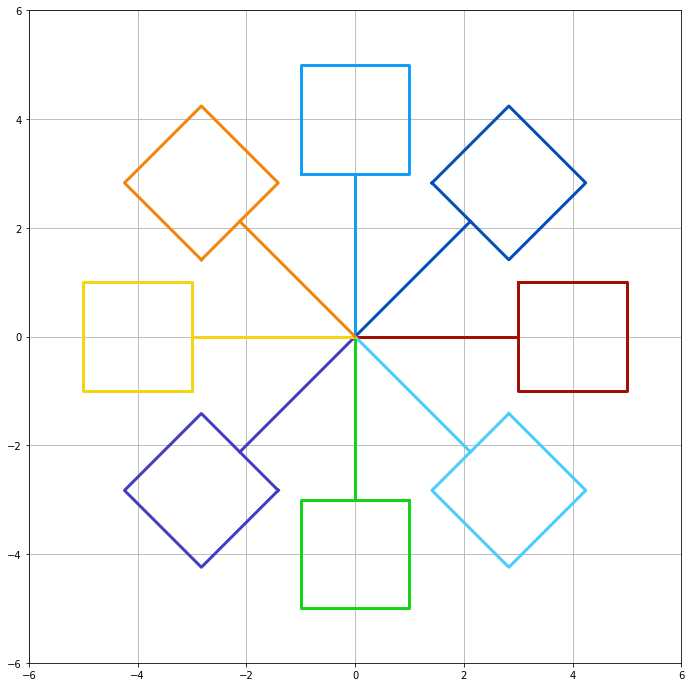

In [57]:
# 起始座標
loc = np.array([[0, 0], # 中心
                [0, 3], # 直線連接正方形位置
                [-1, 3], # 正方形左下
                [1, 3], # 正方形右下
                [1, 5], # 正方形右上
                [-1, 5], # 正方形左上
                [-1, 3]]) # 回起始點
n = 8 # 正方形數量

def square(n, loc):
    n = n
    loc = loc
    angle = np.linspace(0, 2*np.pi, n, endpoint= False)

    fig, ax = plt.subplots(figsize = [12, 12])
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_aspect("equal")
    ax.grid(True)

    # 顏色順序
    color = ["#119EF7", "#0250B6", "#A40F03", "#4ACCFF", "#15D317", "#453DBF", "#F5D315", 
            "#F3840D"]
    color_select = 0

    # 畫圖
    for i in angle:
        # 旋轉矩陣設定
        rot_mat = np.array([[np.cos(i), -np.sin(i)],
                        [np.sin(i), np.cos(i)]])
        
        rotate = np.matmul(loc, rot_mat)
        line_loc = list(zip(rotate[0], rotate[1]))
        square_loc = rotate[2:].ravel(order = "F").reshape(2, 5, order = "C")
        col = color[color_select % len(color)]
        ax.plot(line_loc[0], line_loc[1], color = col, lw = 3)
        ax.plot(square_loc[0], square_loc[1], color = col, lw = 3)
        color_select += 1
    plt.show()
square(n, loc)

## <b>n = 50</b>

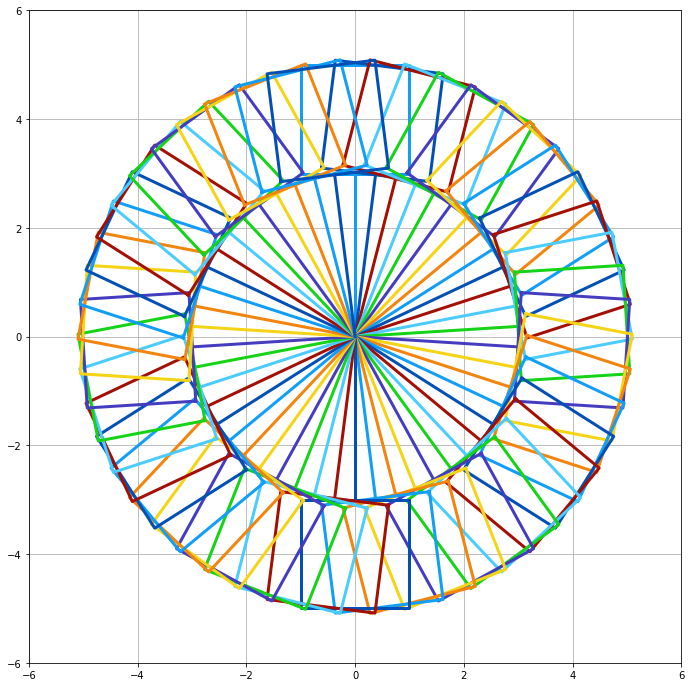

In [58]:
square(50, loc)

## 第三題: output出卡方的table
## 討論
因為在<i>scipy.stats.chi2()</i>裡有很多種參數以及不同的計算方法，所以要先讀過手冊知道裡面是怎麼計算的再來使用。 <br/>
而這題的需求是給定df跟upper tail probability的值，要回推卡方值，而最相近的function應該就是<i>ppf()</i> <br/>
但需要注意的是他給的是percent point function，也就是說給定的quantile會認定是從左邊開始算<br/>
所以在計算的時候應該要input <i>1 - q</i>


In [55]:
upper_tail = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.05, 0.025, 0.01, 0.005]
row = []

for i in range(1, 30, 1):
    value = []
    for j in upper_tail:
        value.append(np.round(chi2.ppf(1 - j, df = i), 3))
    row.append(value)

col_names = [str(i) for i in upper_tail]
row_names = [str(i) for i in range(1, 30, 1)]
table = pd.DataFrame(row)
table.columns = col_names
table.index = row_names
table.to_excel(r"D:\In class\statistical computing\for_py\chi_table.xlsx")

## Extension
這題客製化了一個圖形，只要輸入自由度跟想要的upper tail的機率，便可以畫出相對應的圖形 <br/>
右上角用$ax.text()$來顯示這個upper tail的機率是多少 <br/>
x軸則用紅字顯示出相對應的卡方值
要注意的一點是x的範圍不能從0開始，否則probability density會有Inf的情形出現，所以有稍作amend

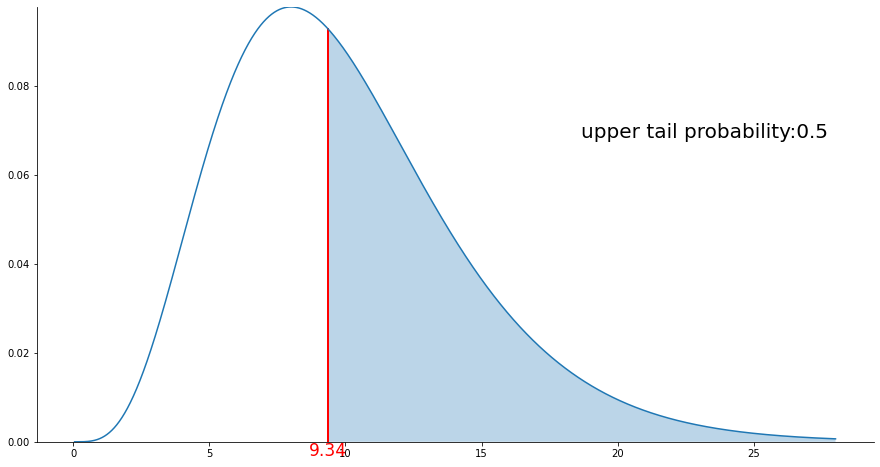

In [56]:
# 參數設定
df = 10 # 自由度
upper_tail = 0.5 # upper tail probability

#-------------------------------------

# 座標設定
x = np.linspace(0.05, df * 2.8, 5000)
y = chi2.pdf(x, df = df)
chi = chi2.ppf(1 - upper_tail, df = df)
fill_range_x = x[x > chi]
fill_range_y = chi2.pdf(fill_range_x, df = df)

#-------------------------------------

# 畫圖
fig, ax = plt.subplots(figsize = [15, 8])
ax.plot(x, y)
ax.vlines(x = chi, ymin = 0, ymax = chi2.pdf(chi, df = df), color = "red", lw = 2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim([0, max(y)])

ax.fill_between(fill_range_x, fill_range_y, 0, alpha = 0.3) #第一個參數指定要填滿的x值，第二個第三個參數分別設定要fill between的y值
ax.text(chi, 0, s = str(round(chi, 2)), color = "red", size = 17, ha = "center", va = "top") # ha跟va分別在調整text跟其設定的coord的relative position
ax.text(0.65, 0.7, s = r"upper tail probability:" + str(upper_tail), transform = ax.transAxes, size = 20) # transfor讓坐標軸設定改為axes coordinate
plt.show()